In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt


def generate_synthetic_events(num_events, sensor_height, sensor_width):
    timestamps = np.random.uniform(0, 1, num_events)
    x_coords = np.random.randint(0, sensor_height, num_events)
    y_coords = np.random.randint(0, sensor_width, num_events)
    polarities = np.random.choice([-1, 1], num_events)
    events = np.vstack((timestamps, x_coords, y_coords, polarities)).T
    return events

def normalize_events(events, sensor_height, sensor_width):
    min_t, max_t =  events[:, 0].min(), events[:, 0].max()

    # Normalize timestamp
    events[:, 0] = (events[:, 0] - min_t) / max_t - min_t

    # Normalize x, y coordinates
    events[:, 1] = events[:, 1] / sensor_height
    events[:, 2] = events[:, 2] / sensor_width
    return events

def embed_events(events, num_bins, sensor_height, sensor_width):
    # Normalize events
    norm_events = normalize_events(events, sensor_height, sensor_width)

    # Initialize voxel grid
    voxel_grid = np.zeros((num_bins, sensor_width, sensor_height), dtype=np.float32)

    # Discretize the timestamps into bins
    t_indices = (events[:, 0] * (num_bins-1)).astype(int)

    for t, x, y, p in events:
        t_idx = int(t * (num_bins - 1))
        x_idx = int(x * (sensor_height - 1))
        y_idx = int(y * (sensor_width - 1))
        voxel_grid[t_idx, y_idx, x_idx] += p

    return torch.tensor(voxel_grid)


def visualize_voxel_grid(voxel_grid):
    num_bins = voxel_grid.shape[0]
    fig, axes = plt.subplots(1, num_bins, figsize=(15, 3))
    for i in range(num_bins):
        axes[i].imshow(voxel_grid[i], cmap='hot', interpolation='nearest')
        axes[i].set_title(f'Time Bin {i+1}')
        axes[i].axis('off')
    plt.show()
    
def visualize_voxel_grid_3d(voxel_grid):
    # Convert to numpy array if voxel_grid is a torch.Tensor
    if isinstance(voxel_grid, torch.Tensor):
        voxel_grid = voxel_grid.numpy()
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    num_bins, sensor_height, sensor_width = voxel_grid.shape

    # Get the non-zero indices
    indices = np.nonzero(voxel_grid)
    x, y, z = indices[2], indices[1], indices[0]  # Reorder to (x, y, z)
    c = voxel_grid[z, y, x]  # Use the polarity as the color

    ax.scatter(x, y, z, c=c, cmap='coolwarm', marker='o')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Time Bin')
    plt.show()

def visualize_events_as_spikes(events, num_bins, sensor_width, sensor_height):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Normalize events for visualization
    events = normalize_events(events, sensor_width, sensor_height)
    t_indices = (events[:, 0] * (num_bins - 1)).astype(int)
    x_coords = (events[:, 1] * (sensor_width - 1)).astype(int)
    y_coords = (events[:, 2] * (sensor_height - 1)).astype(int)
    
    # Plot each event as a spike
    for i in range(len(events)):
        t = t_indices[i]
        x = x_coords[i]
        y = y_coords[i]
        p = events[i, 3]
        
        ax.quiver(x, y, t, 0, 0, p, color='r' if p > 0 else 'b', arrow_length_ratio=0.1)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Time Bin')
    plt.show()


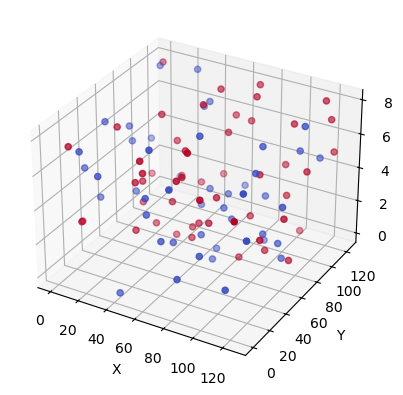

In [2]:
# Parameters
num_events = 100
sensor_width = 128
sensor_height = 128
num_bins = 10

# Generate, embed, and visualize events
events = generate_synthetic_events(num_events, sensor_width, sensor_height)
voxel_grid = embed_events(events, num_bins, sensor_width, sensor_height)
# visualize_voxel_grid(voxel_grid)
visualize_voxel_grid_3d(voxel_grid)

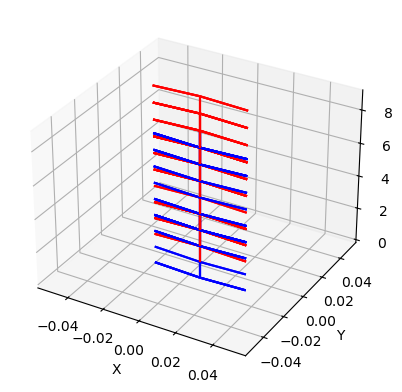

In [3]:
visualize_events_as_spikes(events, num_bins, sensor_width, sensor_height)